In [9]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

#import warnings
#warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'


from IPython.display import Image



from pylab import rcParams
from sklearn.preprocessing import scale
from collections import Counter

In [10]:
KOR_FAM = pd.read_csv('KOR.csv', delimiter=';')

In [11]:
KOR_FAM.head()

,NUMBER,NAME,DESIG,FAM,S,CLASS,S.1,F,DIA.,S.2,...,F.3,AMIN,AMAX,U,NOTES,BIN,PRI,SAM,SD,WF
0,158,Koronis,NaN,KOR,S,S,C,NaN,34.25,L,...,NaN,0.28,0.43,3.0,NaN,NaN,NaN,Y,NaN,NaN
1,167,Urda,NaN,KOR,S,S,L,NaN,44.00,M,...,NaN,0.24,0.39,3.0,NaN,NaN,NaN,Y,NaN,NaN
2,208,Lacrimosa,NaN,KOR,S,S,C,NaN,40.70,L,...,NaN,0.15,0.33,3.0,NaN,NaN,NaN,Y,NaN,NaN
3,243,Ida,NaN,KOR,S,S,S,NaN,27.99,M,...,NaN,0.45,0.86,3.0,NaN,B,NaN,Y,NaN,NaN
4,263,Dresda,NaN,KOR,S,S,D,NaN,23.16,L,...,NaN,0.37,0.55,3.0,NaN,NaN,NaN,Y,NaN,NaN


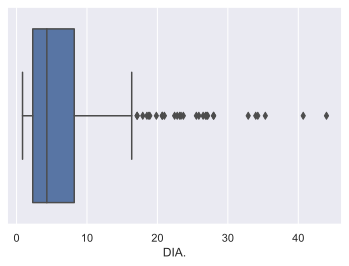

In [19]:
sns.boxplot(x='DIA.', data=KOR_FAM);

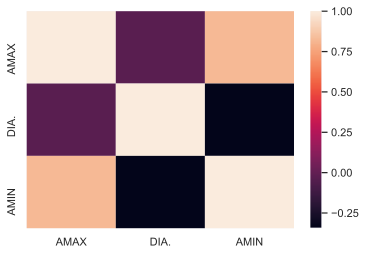

In [20]:
numerical = list(set(['DIA.', 'AMIN', 'AMAX']))
corr_matrix = KOR_FAM[numerical].corr()
sns.heatmap(corr_matrix);

In [2]:
KOR_FAM.corr()


NameError: name 'KOR_FAM' is not defined

Text(0, 0.5, 'Amplitud mínima')

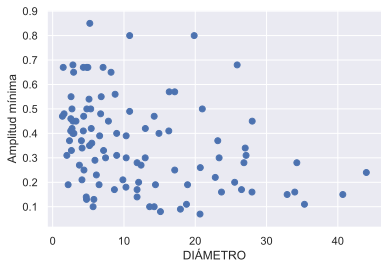

In [22]:
plt.scatter(KOR_FAM['DIA.'], KOR_FAM['AMIN']);
plt.xlabel('DIÁMETRO', fontdict=None, labelpad=None)
plt.ylabel('Amplitud mínima', fontdict=None, labelpad=None)

Text(0, 0.5, 'Amplitud máxima')

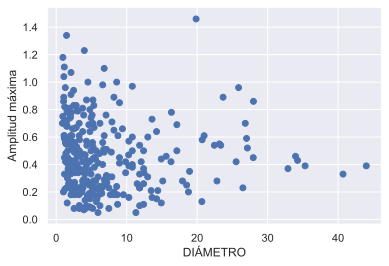

In [23]:
plt.scatter(KOR_FAM['DIA.'], KOR_FAM['AMAX']);
plt.xlabel('DIÁMETRO', fontdict=None, labelpad=None)
plt.ylabel('Amplitud máxima', fontdict=None, labelpad=None)

In [28]:
x= np.array(CKOR['DIA.'])
y= np.array(CKOR['H'])

np.polyfit(np.log(x),y,1)

array([-2.11196268, 17.10944524])

C:\Users\RcrdPhysics\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Magnitud Absoluta')

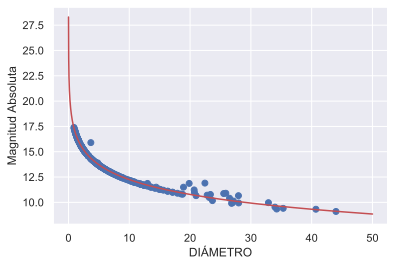

In [31]:
x= np.array(CKOR['DIA.'])
y= np.array(CKOR['H'])

np.polyfit(np.log(x),y,1)
s=np.linspace(0,50,10000)
t=-2.11196268*np.log(s) + 17.10944524

plt.plot(s,t, 'r')
plt.scatter(CKOR['DIA.'], CKOR['H']);
plt.xlabel('DIÁMETRO', fontdict=None, labelpad=None)
plt.ylabel('Magnitud Absoluta', fontdict=None, labelpad=None)

## Eliminando asteroides con datos incompletos

In [32]:
KOR_FAM.describe(include=['object'])

,NAME,DESIG,FAM,S,CLASS,S.1,S.2,S.3,F.2,F.3,NOTES,BIN,SAM,SD,WF
count,348,340,348,348,348,348,348,348,28,13,90,4,49,10,242
unique,348,340,1,4,3,5,8,4,2,1,6,1,1,1,1
top,Verdi,2003 TC2,KOR,A,S,C,T,A,>,>,-,B,Y,Y,Y
freq,1,1,348,318,344,309,169,316,15,13,35,4,49,10,242


In [34]:
KOR_FAM.describe()

,NUMBER,F,DIA.,H,B,F.1,ALBEDO,PERIOD,P,DESC,AMIN,AMAX,U,PRI
count,348.000000,0.0,348.000000,348.000000,0.0,0.0,348.000000,319.000000,0.0,0.0,102.000000,309.000000,310.000000,0.0
mean,61520.632184,NaN,6.701351,13.936351,NaN,NaN,0.234896,14.412988,NaN,NaN,0.358333,0.454175,2.161290,NaN
std,92905.128092,NaN,6.969700,1.857049,NaN,NaN,0.023935,33.328644,NaN,NaN,0.183999,0.254959,0.521187,NaN
min,158.000000,NaN,0.850000,9.100000,NaN,NaN,0.057000,1.000000,NaN,NaN,0.070000,0.050000,1.000000,NaN
25%,4624.500000,NaN,2.300000,12.600000,NaN,NaN,0.240000,3.827000,NaN,NaN,0.200000,0.240000,2.000000,NaN
50%,16512.500000,NaN,4.300000,14.000000,NaN,NaN,0.240000,6.000000,NaN,NaN,0.340000,0.420000,2.000000,NaN
75%,76045.000000,NaN,8.190000,15.392500,NaN,NaN,0.240000,10.839000,NaN,NaN,0.470000,0.600000,2.000000,NaN
max,512729.000000,NaN,44.000000,17.500000,NaN,NaN,0.276600,321.546000,NaN,NaN,0.850000,1.460000,3.000000,NaN


Tenemos 348 asteroides, de los cuales tienen:

348, el valor del diámetro

102, amplitud mínima

309, aplitud máxima 

319, Periodo

In [215]:
KOR_FAM.replace([np.inf, -np.inf], np.nan)
CKOR=KOR_FAM.dropna(subset=['DIA.', 'AMAX', 'PERIOD'])

In [169]:
CKOR.head()

,NUMBER,NAME,DESIG,FAM,S,CLASS,S.1,F,DIA.,S.2,...,F.3,AMIN,AMAX,U,NOTES,BIN,PRI,SAM,SD,WF
0,158,Koronis,NaN,KOR,S,S,C,NaN,34.25,L,...,NaN,0.28,0.43,3.0,NaN,NaN,NaN,Y,NaN,NaN
1,167,Urda,NaN,KOR,S,S,L,NaN,44.00,M,...,NaN,0.24,0.39,3.0,NaN,NaN,NaN,Y,NaN,NaN
2,208,Lacrimosa,NaN,KOR,S,S,C,NaN,40.70,L,...,NaN,0.15,0.33,3.0,NaN,NaN,NaN,Y,NaN,NaN
3,243,Ida,NaN,KOR,S,S,S,NaN,27.99,M,...,NaN,0.45,0.86,3.0,NaN,B,NaN,Y,NaN,NaN
4,263,Dresda,NaN,KOR,S,S,D,NaN,23.16,L,...,NaN,0.37,0.55,3.0,NaN,NaN,NaN,Y,NaN,NaN


In [216]:
CKOR.describe()

,NUMBER,F,DIA.,H,B,F.1,ALBEDO,PERIOD,P,DESC,AMIN,AMAX,U,PRI
count,305.000000,0.0,305.000000,305.000000,0.0,0.0,305.000000,305.000000,0.0,0.0,102.000000,305.000000,296.000000,0.0
mean,53050.150820,NaN,7.031639,13.828066,NaN,NaN,0.234766,14.337517,NaN,NaN,0.358333,0.452656,2.168919,NaN
std,80780.380678,NaN,7.257513,1.844712,NaN,NaN,0.024901,33.732669,NaN,NaN,0.183999,0.256208,0.532197,NaN
min,158.000000,NaN,0.890000,9.100000,NaN,NaN,0.057000,1.000000,NaN,NaN,0.070000,0.050000,1.000000,NaN
25%,4351.000000,NaN,2.530000,12.500000,NaN,NaN,0.240000,3.822000,NaN,NaN,0.200000,0.240000,2.000000,NaN
50%,15277.000000,NaN,4.440000,13.930000,NaN,NaN,0.240000,6.034000,NaN,NaN,0.340000,0.420000,2.000000,NaN
75%,66742.000000,NaN,8.580000,15.150000,NaN,NaN,0.240000,10.697000,NaN,NaN,0.470000,0.600000,2.000000,NaN
max,512729.000000,NaN,44.000000,17.400000,NaN,NaN,0.276600,321.546000,NaN,NaN,0.850000,1.460000,3.000000,NaN


In [171]:
CKOR.corr()

,NUMBER,F,DIA.,H,B,F.1,ALBEDO,PERIOD,P,DESC,AMIN,AMAX,U,PRI
NUMBER,1.000000,NaN,-0.444263,0.732111,NaN,NaN,0.090878,-0.089243,NaN,NaN,0.229128,0.244166,-0.235775,NaN
F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DIA.,-0.444263,NaN,1.000000,-0.873200,NaN,NaN,-0.406248,0.004975,NaN,NaN,-0.344202,-0.029464,0.580705,NaN
H,0.732111,NaN,-0.873200,1.000000,NaN,NaN,0.238221,-0.050947,NaN,NaN,0.368148,0.156537,-0.525731,NaN
B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALBEDO,0.090878,NaN,-0.406248,0.238221,NaN,NaN,1.000000,-0.001425,NaN,NaN,0.039944,-0.052005,-0.205168,NaN
PERIOD,-0.089243,NaN,0.004975,-0.050947,NaN,NaN,-0.001425,1.000000,NaN,NaN,0.114537,0.033888,-0.181115,NaN
P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DESC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


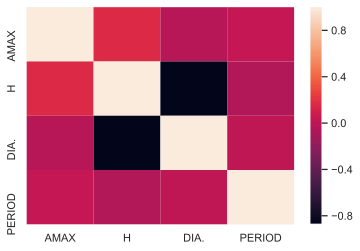

In [172]:
numerical2 = list(set(['DIA.','H', 'AMAX', 'PERIOD']))
corr_matrix2 = CKOR[numerical2].corr()
sns.heatmap(corr_matrix2);

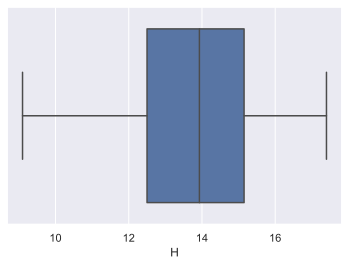

In [234]:
sns.boxplot(x='H', data=CKOR);

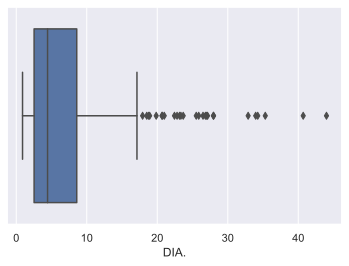

In [233]:
sns.boxplot(x='DIA.', data=CKOR);

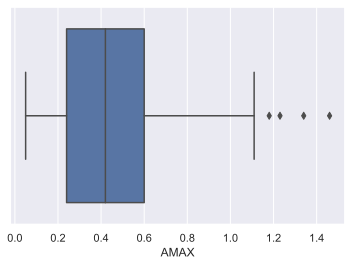

In [232]:
sns.boxplot(x='AMAX', data=CKOR);

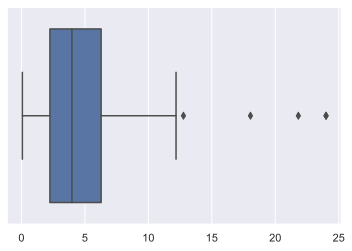

In [195]:
sns.boxplot(freq);

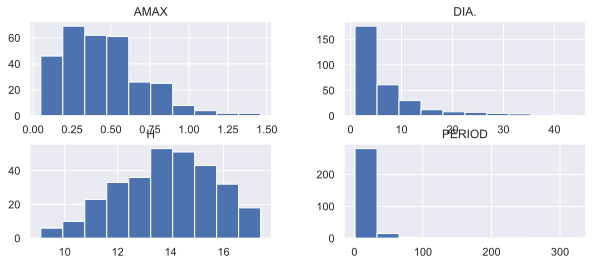

In [231]:
hist4 = ['DIA.', 'H', 'AMAX', 'PERIOD']
CKOR[hist4].hist(figsize=(10, 4));


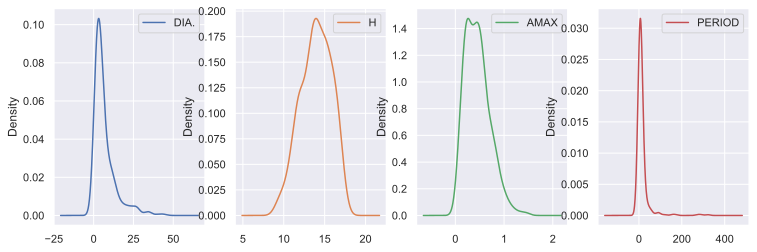

In [197]:
CKOR[hist4].plot(kind='density', subplots=True, layout=(1, 4), 
                  sharex=False, figsize=(12.5,4));

In [235]:
CKOR[hist4].describe()

,DIA.,H,AMAX,PERIOD
count,305.000000,305.000000,305.000000,305.000000
mean,7.031639,13.828066,0.452656,14.337517
std,7.257513,1.844712,0.256208,33.732669
min,0.890000,9.100000,0.050000,1.000000
25%,2.530000,12.500000,0.240000,3.822000
50%,4.440000,13.930000,0.420000,6.034000
75%,8.580000,15.150000,0.600000,10.697000
max,44.000000,17.400000,1.460000,321.546000


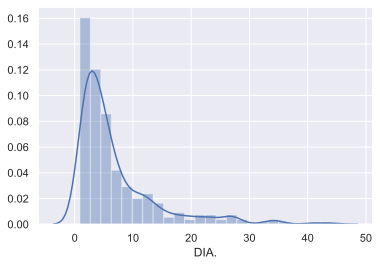

In [179]:
sns.distplot(CKOR['DIA.']);

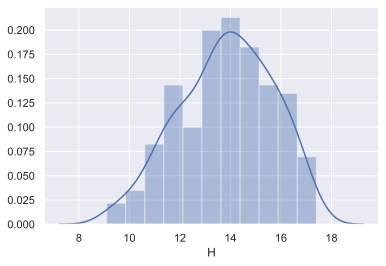

In [180]:
sns.distplot(CKOR['H']);

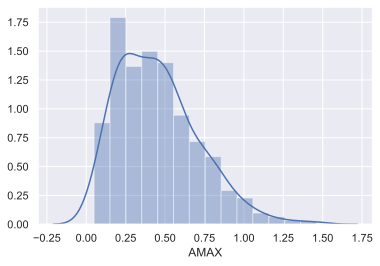

In [181]:
sns.distplot(CKOR['AMAX']);

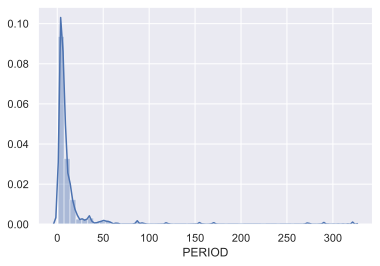

In [222]:
sns.distplot(CKOR['PERIOD'])

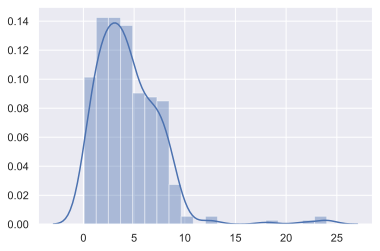

In [198]:
sns.distplot(freq)

In [199]:
CKOR.describe()

,NUMBER,F,DIA.,H,B,F.1,ALBEDO,PERIOD,P,DESC,AMIN,AMAX,U,PRI
count,305.000000,0.0,305.000000,305.000000,0.0,0.0,305.000000,305.000000,0.0,0.0,102.000000,305.000000,296.000000,0.0
mean,53050.150820,NaN,7.031639,13.828066,NaN,NaN,0.234766,14.337517,NaN,NaN,0.358333,0.452656,2.168919,NaN
std,80780.380678,NaN,7.257513,1.844712,NaN,NaN,0.024901,33.732669,NaN,NaN,0.183999,0.256208,0.532197,NaN
min,158.000000,NaN,0.890000,9.100000,NaN,NaN,0.057000,1.000000,NaN,NaN,0.070000,0.050000,1.000000,NaN
25%,4351.000000,NaN,2.530000,12.500000,NaN,NaN,0.240000,3.822000,NaN,NaN,0.200000,0.240000,2.000000,NaN
50%,15277.000000,NaN,4.440000,13.930000,NaN,NaN,0.240000,6.034000,NaN,NaN,0.340000,0.420000,2.000000,NaN
75%,66742.000000,NaN,8.580000,15.150000,NaN,NaN,0.240000,10.697000,NaN,NaN,0.470000,0.600000,2.000000,NaN
max,512729.000000,NaN,44.000000,17.400000,NaN,NaN,0.276600,321.546000,NaN,NaN,0.850000,1.460000,3.000000,NaN


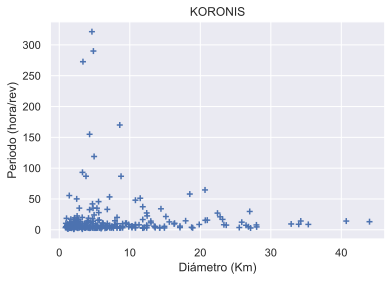

In [200]:
plt.scatter(CKOR['DIA.'], CKOR['PERIOD'], marker='+');
plt.title("KORONIS")
plt.xlabel("Diámetro (Km)")
plt.ylabel("Periodo (hora/rev)")
plt.show()


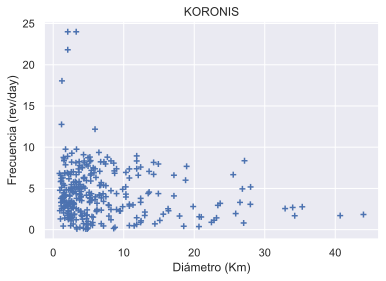

In [217]:
#Leyendo KOR_FAM para eliminar los asteroides que no tienen el dato del periodo
#KOR_FAM.replace([np.inf, -np.inf], np.nan)
#cfreq=KOR_FAM.dropna(subset=['PERIOD', 'DIA.', 'AMAX'])
#estableciendo la frecuencia para los asteroides con periodos establecidos
freq=(24)/(np.array(CKOR['PERIOD']))
#ploteando frecuencia vs diámetro

#El periodo está en horas/ciclo


plt.scatter(CKOR['DIA.'], freq, marker='+');
plt.title("KORONIS")
plt.xlabel("Diámetro (Km)")
plt.ylabel("Frecuencia (rev/day)")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022C9357F710>]],
      dtype=object)

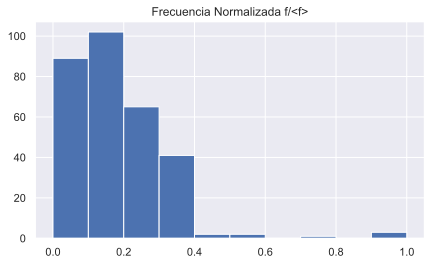

In [218]:
# NORMALIZANDO LAS FRECUENCIAS
z= (freq - min(freq))/(max(freq)-min(freq))
zz=z.tolist()
#type(zz)

zzz=pd.DataFrame(zz)
zzz.columns=['Frecuencia Normalizada f/<f>']
#type(zzz)
#print(zzz)
zzz.hist(figsize=(7, 4))


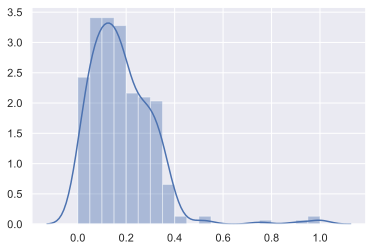

In [219]:
sns.distplot(zzz)

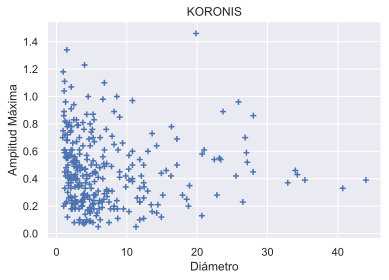

In [223]:
plt.scatter(CKOR['DIA.'], CKOR['AMAX'], marker='+');
plt.title("KORONIS")
plt.xlabel("Diámetro")
plt.ylabel("Amplitud Máxima")
plt.show()

In [210]:
#CKOR.replace([np.inf, -np.inf], np.nan)
#cfreq=CKOR.dropna(subset=['PERIOD','AMAX','DIA.'])
#estableciendo la frecuencia para los asteroides con periodos establecidos
#freq=(24)/(np.array(cfreq['PERIOD']))

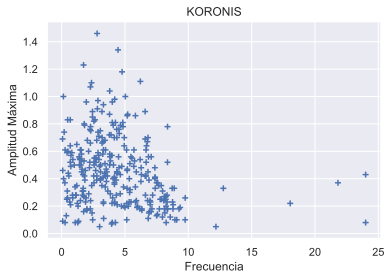

In [227]:
plt.scatter(freq, CKOR['AMAX'], marker='+');
plt.title("KORONIS")
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud Máxima")
plt.show()

# Extra

Text(0, 0.5, 'Magnitud Absoluta')

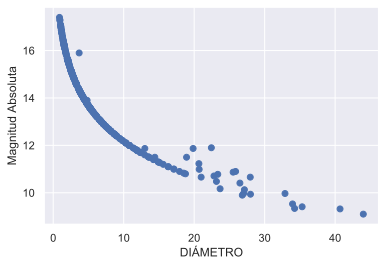

In [228]:
plt.scatter(CKOR['DIA.'], CKOR['H']);
plt.xlabel('DIÁMETRO', fontdict=None, labelpad=None)
plt.ylabel('Magnitud Absoluta', fontdict=None, labelpad=None)

Text(0, 0.5, 'Magnitud Absoluta')

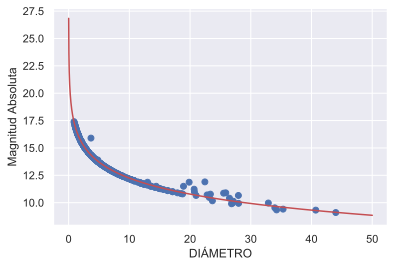

In [230]:
x= np.array(CKOR['DIA.'])
y= np.array(CKOR['H'])

np.polyfit(np.log(x),y,1)
s=np.linspace(0.01,50,10000)
t=-2.11196268*np.log(s) + 17.10944524

plt.plot(s,t, 'r')
plt.scatter(CKOR['DIA.'], CKOR['H']);
plt.xlabel('DIÁMETRO', fontdict=None, labelpad=None)
plt.ylabel('Magnitud Absoluta', fontdict=None, labelpad=None)